In [5]:
# Libraries and stuff

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
from matplotlib import ticker

import netCDF4
from netCDF4 import Dataset

# Remove warning and live a happy life
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
from matplotlib import dates
from datetime import date, timedelta
import pandas as pd

import utils

We illustrate the main steps of this study by looking at a single time series.

We focus on the San Francisco tide gauge for the period 1900-2018. We consider sea level in June-July-August (JJA) and quantify (linear) changes in the first four statistical moments.

This is done in 2 steps.

- Step (a)

compute the quantile regression for a range of quantiles.

For each quantile we create a bootstrapped distribution using N resampling (e.g., N = 1000). To do so we adopt block-bootstrapping with blocks of 1 season. Main assumption: sea level data in the same season but across different years can be considered as iid random variables.

The bootstrap PDF helps us quantifying (i) statistical significance and (j) confidence level of each q. regression

- Step (b)

Additionally we want to quantify changes in the first 4 moments of the distribution. To do so we use a Legendre basis we defined. It turns out that this basis are actually Hermite polynomials of a Quantile Function of a standard normal N[0,1].

- bootstrap the time series (with trend) N times
- project slope of each quantile into basis functions associated with thee first 4 moments
- quantify the significance of changes in different moments given the bootstrapped distribution

# Functions

## Loading netcdf

In [3]:
################# Loading Netcdfs

import netCDF4
from netCDF4 import Dataset
def importNetcdf(path,variable_name):
    nc_fid = Dataset(path, 'r')
    field = nc_fid.variables[variable_name][:]
    return field

# From masked array to np.array
def masked_array_to_numpy(data):
    return np.ma.filled(data.astype(np.float32), np.nan);

# Load dates for these time series
def importNetcdf_attributes(path,variable_name):
    nc_fid = Dataset(path, 'r')
    #start = int(nc_fid.variables[variable_name].first_record_date[0:4])
    #end  = int(nc_fid.variables[variable_name].last_record_date[0:4])
    start = nc_fid.variables[variable_name].first_record_date
    end = nc_fid.variables[variable_name].last_record_date
    return start, end

# Load Data

In [8]:
eason = 'JJA'
tg_id = 'san_francisco_ca'

path = './SF/sf_JJA_1900_2018.nc'

# Load time
# time: day since 1846-01-04
time = masked_array_to_numpy(importNetcdf(path,'time'))

# Load tide gauge
data = masked_array_to_numpy(importNetcdf(path,tg_id))

# How many data are nans?
ratio = len(data[np.isnan(data)])/len(data)
nan_percentage = ratio
print('Percentage of missing values?')
print('Tide Gauge: '+tg_id + ' ---> ' + str(np.round(ratio*100,2))+' %')

Percentage of missing values?
Tide Gauge: san_francisco_ca ---> 0.34 %


## Quantile regression

In [10]:
# quantiles considered
qs = np.arange(0.02, 1.00, 0.02)

xt = time
yt = data
n = 1000
y_predicted, slopes, significances, upper_bounds, lower_bounds = utils.q_reg_analysis(xt,yt,qs,n)

Analysis for quantile 0.02 complete
Analysis for quantile 0.04 complete
Analysis for quantile 0.06 complete
Analysis for quantile 0.08 complete
Analysis for quantile 0.1 complete
Analysis for quantile 0.12 complete
Analysis for quantile 0.14 complete
Analysis for quantile 0.16 complete
Analysis for quantile 0.18 complete
Analysis for quantile 0.2 complete
Analysis for quantile 0.22 complete
Analysis for quantile 0.24 complete
Analysis for quantile 0.26 complete
Analysis for quantile 0.28 complete
Analysis for quantile 0.3 complete
Analysis for quantile 0.32 complete
Analysis for quantile 0.34 complete
Analysis for quantile 0.36 complete
Analysis for quantile 0.38 complete
Analysis for quantile 0.4 complete
Analysis for quantile 0.42 complete
Analysis for quantile 0.44 complete
Analysis for quantile 0.46 complete
Analysis for quantile 0.48 complete
Analysis for quantile 0.5 complete
Analysis for quantile 0.52 complete
Analysis for quantile 0.54 complete
Analysis for quantile 0.56 comple

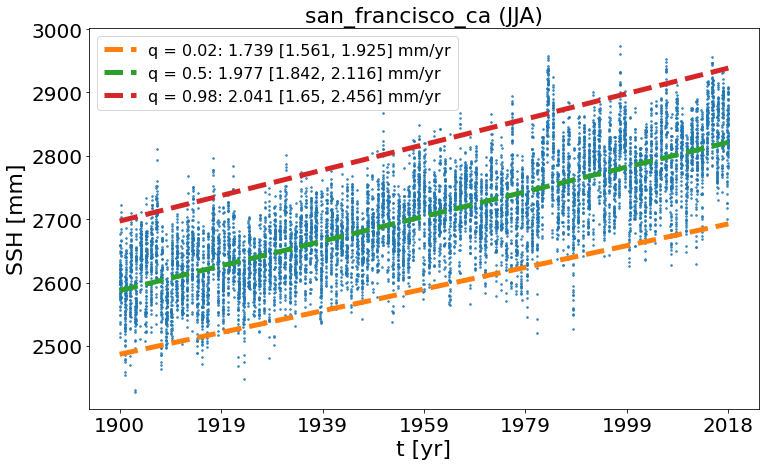

In [14]:
# Extract indices for the 0.05, 0.5 and 0.95 quantiles
# Quantiles used for quantile regression
quantiles_qr = quantiles_qr = np.round(qs,2)
# indices correspondent to quantiles 0.05, 0.5 and 0.95
idx_05 = np.where(quantiles_qr==0.02)[0][0]
idx_5 = np.where(quantiles_qr==0.5)[0][0]
idx_95 = np.where(quantiles_qr==0.98)[0][0]

x = data
TIME_VEC = time
TITLE = tg_id + ' (JJA)'
    
#t = np.arange(1,14610+1,1)
start = date(1846,1,4) 
    
# Define a time array to plot
time_for_plotting = TIME_VEC-TIME_VEC[0] 
    
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot()
ax.plot(time_for_plotting,x,".",linewidth = 3, markersize = 3,markerfacecolor='none',alpha = 1) #,alpha = 1
#i = 0
#ax.plot(time_for_plotting,y_predicted[i][idx_01],'--',linewidth = 3, label = 'q = 0.01: ' +str(np.round(slopes[i][idx_01]*365,3))+' '+str([np.round(lower_bounds[i][idx_01]*365,3),np.round(upper_bounds[i][idx_01]*365,3)])+' mm/yr')
ax.plot(time_for_plotting,y_predicted[idx_05],'--',linewidth = 5, label = 'q = 0.02: ' +str(np.round(slopes[idx_05]*365,3))+' '+str([np.round(lower_bounds[idx_05]*365,3),np.round(upper_bounds[idx_05]*365,3)])+' mm/yr')
#i = 1
ax.plot(time_for_plotting,y_predicted[idx_5],'--',linewidth = 5, label = 'q = 0.5: ' +str(np.round(slopes[idx_5]*365,3))+' '+str([np.round(lower_bounds[idx_5]*365,3),np.round(upper_bounds[idx_5]*365,3)])+' mm/yr')
#i = 2
ax.plot(time_for_plotting,y_predicted[idx_95],'--',linewidth = 5, label = 'q = 0.98: ' +str(np.round(slopes[idx_95]*365,3))+' '+str([np.round(lower_bounds[idx_95]*365,3),np.round(upper_bounds[idx_95]*365,3)])+' mm/yr')
#ax.plot(time_for_plotting,y_predicted[i][idx_99],'--',linewidth = 3, label = 'q = 0.99: ' +str(np.round(slopes[i][idx_99]*365,3))+' '+str([np.round(lower_bounds[i][idx_99]*365,3),np.round(upper_bounds[i][idx_99]*365,3)])+' mm/yr')
ax.legend(fontsize = 16)

plt.xlabel('t [yr]',fontsize = 22)
plt.ylabel('SSH [mm]',fontsize = 22)
plt.title(TITLE,fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
    
#plt.ylim([y_lim_minus,y_lim_plus])

########################################## SET THE X-AXIS

# THIS PART SHOULD BE DONE BETTER. Thinking about plotting after the main analysis.
# Set thee x-axis

# we consider n ticks
n_plot = 7
ax.set_xticks(list(np.round(np.linspace(0,time_for_plotting[-1],n_plot),0)))

dates = []
# steps in time to consider
#t_steps = np.round(np.linspace(0,len(ts)-1,10),0) np.round(np.linspace(0,len(TIME_VEC),n),0)
t_steps = np.round(np.linspace(0,len(TIME_VEC)-1,n_plot),0)
for i in t_steps:    
    i = int(i)
    dates.append(str((start + timedelta(np.int(TIME_VEC[i]))).year))
ax.set_xticklabels(dates)

plt.show()

#fig.savefig('./figures/slope_SF_jja.png',bbox_inches='tight')

## Projection onto basis

In [12]:
# quantiles considered
qs = np.arange(0.02, 1.00, 0.02)

xt = time
yt = data
n = 1000

coeffs, sigs = utils.changes_in_moments(xt,yt,n,qs)

In [15]:
print('Changes in statistical moments')
print('')
print('Changes in the mean = '+str(np.round(coeffs[0]*365,3))+' mm/yr')
print('Statistical significant? '+str(sigs[0]))
print('')
print('Changes in the variance = '+str(np.round(coeffs[1]*365,3))+' mm/yr')
print('Statistical significant? '+str(sigs[1]))
print('')
print('Changes in the skewness = '+str(np.round(coeffs[2]*365,3))+' mm/yr')
print('Statistical significant? '+str(sigs[2]))
print('')
print('Changes in the kurtosis = '+str(np.round(coeffs[3]*365,3))+' mm/yr')
print('Statistical significant? '+str(sigs[3]))
print('')

Changes in statistical moments

Changes in the mean = 1.945 mm/yr
Statistical significant? True

Changes in the variance = 0.16 mm/yr
Statistical significant? False

Changes in the skewness = -0.142 mm/yr
Statistical significant? False

Changes in the kurtosis = 0.136 mm/yr
Statistical significant? False

